<a href="https://colab.research.google.com/github/brianregan111/UCDPA-BrianRegan/blob/main/Project_F1_Data_Analysis_Finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [52]:
#custom function to round numbers to 2 decimal places
def round_to_two_decimal_places(number):
    return round(number, 2)

In [41]:
#import races from CSV
races = 'https://raw.githubusercontent.com/brianregan111/UCDPA-BrianRegan/main/races.csv'
r = pd.read_csv(races , index_col=0) 
#filter dataframe to greater than 2020
r20 = r.loc[r['year'] >= 2020]
#remove unneeded columns
R2020 = r20.iloc[:, 0:4] 
#count number of races per season
races_per_season = R2020['year'].value_counts()
print(races_per_season)

2021    22
2022    22
2020    17
Name: year, dtype: int64


In [42]:
circuits = 'https://raw.githubusercontent.com/brianregan111/UCDPA-BrianRegan/main/circuits.csv'
cir = pd.read_csv(circuits, index_col = 0) 
cir2 = cir.drop('url', axis=1).reset_index()
#create lists of continents 
Countries = ['Australia' ,'Malaysia' ,'Bahrain' ,'Spain' ,'Turkey' ,'Monaco' ,'Canada' ,'France' ,'UK' ,'Germany' ,'Hungary' ,'Belgium' ,'Italy' ,'Singapore' ,'Japan' ,'China' ,'Brazil' ,'USA' ,'UAE' ,'Argentina' ,'Portugal' ,'South Africa' ,'Mexico' ,'Korea' ,'Netherlands' ,'Sweden' ,'Austria' ,'Morocco' ,'Switzerland' ,'India' ,'Russia' ,'Azerbaijan' ,'Saudi Arabia' ,'Qatar' ]
Continent = ['Australia' ,'Asia' ,'Asia' ,'Europe' ,'Europe' ,'Europe' ,'North America' ,'Europe' ,'Europe' ,'Europe' ,'Europe' ,'Europe' ,'Europe' ,'Asia' ,'Asia' ,'Asia' ,'South America' ,'North America' ,'Asia' ,'South America' ,'Europe' ,'Africa' ,'South America' ,'Asia' ,'Europe' ,'Europe' ,'Europe' ,'Africa' ,'Europe' ,'Asia' ,'Asia' ,'Europe' ,'Asia' ,'Asia' ]
#create dictionary
my_dict = {"country":Countries , "Continent":Continent }
#build dataframe
Contmap = pd.DataFrame(my_dict)

#merge to get continent on Circuits table
cir2m = cir2.merge(Contmap, how='left')




In [43]:
#create lists of Activedrivers
Adrivers = ['Nyck de Vries NDV','Nyck de Vries NDV','Yuki Tsunoda TSU','Pierre Gasly GAS','Esteban Ocon OCO','Fernando Alonso ALO','Lance Stroll STR','Charles Leclerc LEC','Carlos Sainz SAI','Pierre Gasly GAS','Kevin Magnussen MAG','Nico Hülkenberg HUL','Lando Norris NOR','Oscar Piastri OSP','Lewis Hamilton HAM','George Russell RUS','Sergio Pérez PER','Logan Sargeant SAR','Alexander Albon ALB','Max Verstappen VER' ]

ActiveD = {"Drivers":Adrivers }
#build dataframe
my_dictdra = pd.DataFrame(ActiveD)
#drop duplicates 
my_dictdra = my_dictdra.drop_duplicates(subset='Drivers')
#display(my_dictdr)

#import driver CSV
drivers = 'https://raw.githubusercontent.com/brianregan111/UCDPA-BrianRegan/main/drivers.csv'
dr = pd.read_csv(drivers , index_col=0) 
dr["Driver"]= dr["forename"] + " " + dr["surname"] + " " + dr["code"]
#display(dr)

**Join Datasets**

In [44]:

results = 'https://raw.githubusercontent.com/brianregan111/UCDPA-BrianRegan/main/results.csv'
res = pd.read_csv(results , index_col=0) 

# merge results with race table to return race results for the past 3 years and race details
Resmerged_race = pd.merge(res,R2020, left_on = 'raceId', right_on = 'raceId', how = 'inner')
#merge on drivert table with driverid to return driver details
Resmerged_Driver = pd.merge(Resmerged_race,dr, left_on = 'driverId', right_on = 'driverId', how = 'inner')
#use dictionary to check the results for active drivers
Resmerged_ACDriver = pd.merge(Resmerged_Driver,my_dictdra, left_on = 'Driver', right_on = 'Drivers', how = 'left')
# merge with cirect to return name location
Res_merged_all = pd.merge(Resmerged_ACDriver,cir2m, left_on = 'circuitId', right_on = 'circuitId', how = 'inner')
#drop unwanted fields
Res_merged_all =  Res_merged_all.drop(['driverId','positionText','constructorId','number_x','round','circuitId','time','milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed','statusId','driverRef','number_y','code','forename','surname','dob'], axis=1)
# convert string to text
Res_merged_all = Res_merged_all.astype({'points':int})
#add calculation on total positions lost or gained in a season
Res_merged_all['positions_loss_gain'] =  Res_merged_all.grid - Res_merged_all.positionOrder

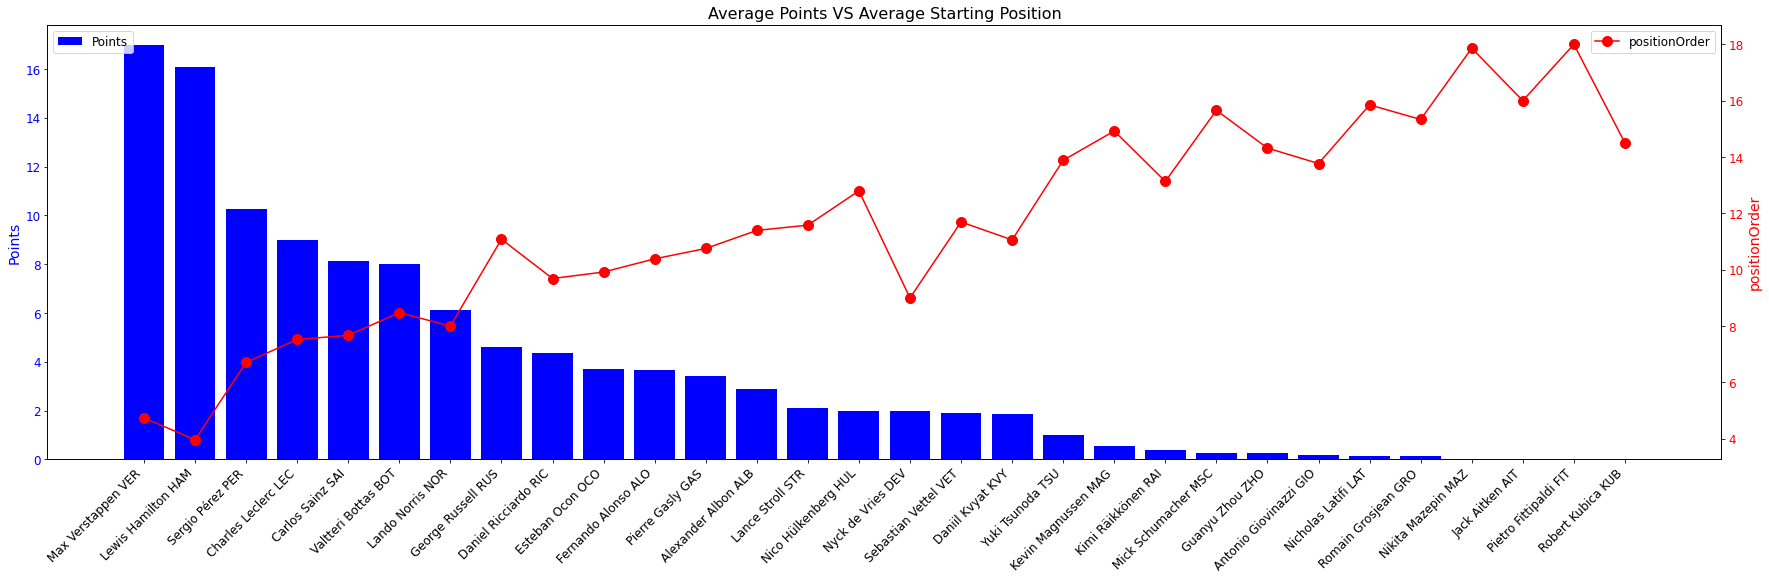

In [45]:
# pivot by driver and return the average finishing position, the average starting position, the average points
pivitmer2= pd.pivot_table(data=Res_merged_all, index='Driver', aggfunc={ 'positionOrder': 'mean','points':'mean','positions_loss_gain':'mean'})
#print(pivitmer2.columns)
pivitmer2['Driver'] = pivitmer2.index
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(30,8))
# order by points 
pivitmer2 = pivitmer2.sort_values('points', ascending=False)


# Create bar chart
ax1.bar(pivitmer2['Driver'], pivitmer2['points'], color='blue')
ax1.set_ylabel('Points', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
# Create line chart
ax2 = ax1.twinx()
ax2.plot(pivitmer2['Driver'], pivitmer2['positionOrder'], color='red', marker='o', markersize=10)
ax2.set_ylabel('positionOrder', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
#Set x-axis labels
ax1.set_xticks(range(len(pivitmer2['Driver'])))
ax1.set_xticklabels(pivitmer2['Driver'], rotation=45, ha='right', fontsize=12)

# Set title and legend
plt.title('Average Points VS Average Starting Position', fontsize=16)
ax1.legend(['Points'], loc='upper left', fontsize=12)
ax2.legend(['positionOrder'], loc='upper right', fontsize=12)

#dropping gridlines
ax1.grid(False)
ax2.grid(False)

#Display chart aand rotate names
plt.xticks(rotation=45)
plt.show()


In [46]:
# get unique years from the the merged sets of data
years = Res_merged_all["year"].unique()

# loop through the years
for year in years:
  # get a subset of the data for the current year and winners only
    year_data = Res_merged_all[(Res_merged_all.year == year) & (Res_merged_all.position == "1")]
    # count the number off drivers who won in the current year
    num_winners = len(year_data["Driver"].unique())
    print(f"In {year}, {num_winners} different drivers won.")

In 2020, 5 different drivers won.
In 2021, 6 different drivers won.
In 2022, 5 different drivers won.


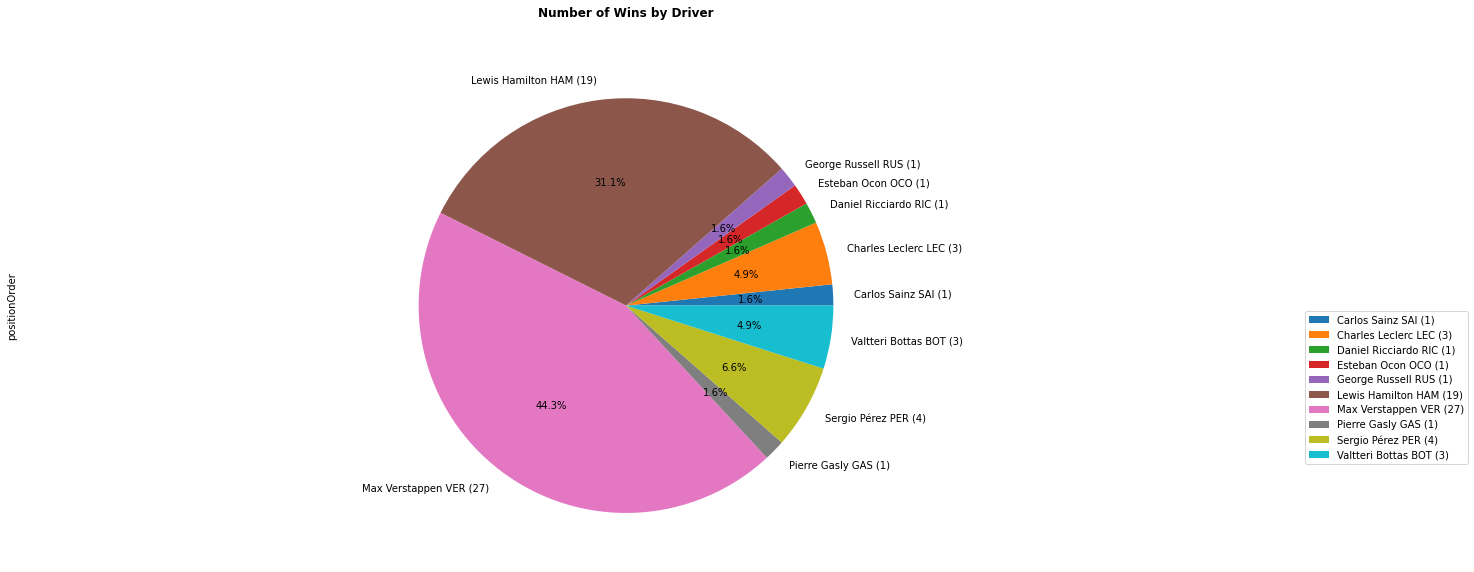

In [47]:
#filter to just winners
winnersonly = Res_merged_all[(Res_merged_all.position == "1")]
#group total 1st time positions by driver
grouped_data = winnersonly.groupby('Driver')['positionOrder'].sum()
# Create a new DataFrame with the grouped data
df_grouped = pd.DataFrame({'Driver': grouped_data.index, 'positionOrder': grouped_data.values})



#CREATE Pie Chart
#space the chart
fig, ax = plt.subplots(figsize=(24, 8))
plt.axis('equal')
# ad labels with values in line
labels = [f"{driver} ({value})" for driver, value in zip(df_grouped['Driver'], df_grouped['positionOrder'])]
#create pie chart 
df_grouped.plot(kind='pie', y='positionOrder', labels=labels, autopct='%1.1f%%', ax=ax, labeldistance=1.1)
#add title, pad it and make it bold
plt.title('Number of Wins by Driver',pad=30,fontweight='bold')  
#anchor the legend
plt.legend( bbox_to_anchor=(1.2, 0.5))
plt.subplots_adjust(left=0.05, right=0.75, top=0.95, bottom=0.05)


#show chart
plt.show()



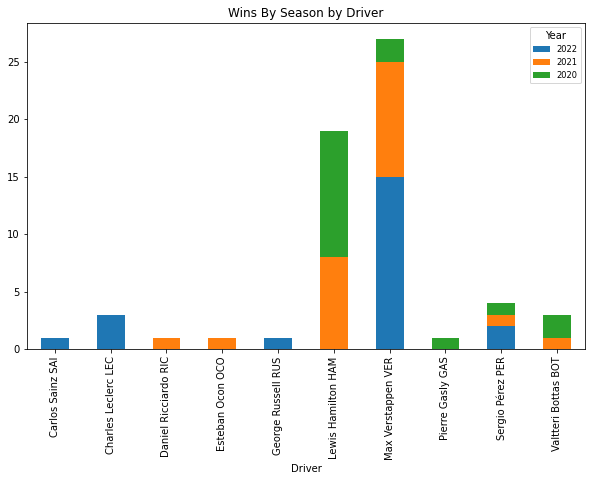

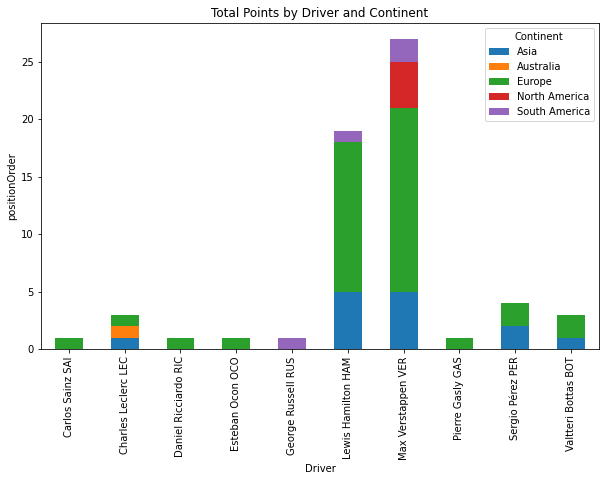

In [48]:
#CreateBarCharts

#groupby year and driver
groupedd2 = winnersonly.groupby(["Driver", winnersonly["year"].astype("string")])["positionOrder"].sum().reset_index()

#creeate empty dictionary
data_dict = {}
#loop through unique years
for year in groupedd2["year"].unique():
    data_dict[year] = groupedd2[groupedd2["year"] == year].set_index("Driver")["positionOrder"]

# convert  arrays to pandas DataFrame
DrivY = pd.DataFrame.from_dict(data_dict)

# create stackd bar chart
ax = DrivY.plot.bar(stacked=True, figsize=(10, 6))
ax.set_title("Wins By Season by Driver")
ax.legend(title="Year", fontsize="small")
ax.tick_params(axis="x", labelrotation=90)
plt.show()

# create group by driver and continent to show the wins per continient
Group_conti = winnersonly.groupby(['Driver','Continent'])['positionOrder'].sum().reset_index()


pivot = Group_conti.pivot(index='Driver', columns='Continent', values='positionOrder')
# Create the stacked bar chart
ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Driver')
ax.set_ylabel('positionOrder')
ax.set_title('Total Points by Driver and Continent')
plt.show()

**Web Scrapping and Cleaning Data**

In [49]:
# webscrape F1 standings website for 2022 standings, get data  & convert to table
url1 = requests.get('https://www.formula1.com/en/results.html/2022/drivers.html')
standings2 = pd.read_html('https://www.formula1.com/en/results.html/2022/drivers.html', index_col = 1)[0]
#drop null columns & add new field for year
Standings22 = standings2.dropna(axis=1,how='all')
Standings22.insert(0, 'Year', '2022')


# webscrape F1 standings website for 2021 standings, get data  & convert to table
url2 = requests.get('https://www.formula1.com/en/results.html/2021/drivers.html')
standings1 = pd.read_html('https://www.formula1.com/en/results.html/2021/drivers.html', index_col = 1)[0]
#drop null columns & add new field for year
Standings21 = standings1.dropna(axis=1,how='all')
Standings21.insert(0, 'Year', '2021')

# webscrape F1 standings website for 2020, standings, get data  & convert to table
url3 = requests.get('https://www.formula1.com/en/results.html/2020/drivers.html')
standings0 = pd.read_html('https://www.formula1.com/en/results.html/2020/drivers.html', index_col = 1)[0]
#drop null columns & add new field for year
Standings20 = standings0.dropna(axis=1,how='all')
Standings20.insert(0, 'Year', '2020')


# redudant as  ammend concat is more efficient: StandingsCOMB = Standings22.append([Standings22, Standings20])
#Concat 4 tables scraped
StandingsCOMB = pd.concat([Standings22,Standings21,Standings20])
#convert field's to int
StandingsCOMB = StandingsCOMB.astype({'Year':int, 'PTS': int})
# sort by year then Points
StandingsCOMB = StandingsCOMB.sort_values(by=['Year', 'PTS'], ascending=[True,False])
#rename column 
StandingsCOMB.rename(columns = { 'PTS':'Points'}, inplace = True)

Loops and Considtional Statements

In [59]:
#Caluclate the average points and assign to varible
avg_points = StandingsCOMB['Points'].mean()

#add conditional statement depending on the varible
StandingsCOMB['Compare to Average'] = np.where(StandingsCOMB['Points'] >= avg_points, 'over', 'under')
#count the number of rows
counts = StandingsCOMB['Compare to Average'].value_counts()
#create varibles for the over and under values 
percentage_over = counts['over'] / len(StandingsCOMB) * 100
percentage_under = counts['under'] / len(StandingsCOMB) * 100
#print varibles annd show as %
print(f"Over: {percentage_over:.2f}%")
print(f"Under: {percentage_under:.2f}%")


#pivot by driver and year, add a total columns to sort by
pvstandings = pd.pivot_table(StandingsCOMB, values='Points', index=['Driver'], columns=['Year'], aggfunc=np.sum, margins=True)
#sort by total column
clpvstandings = pvstandings.sort_values(by='All', ascending=False)
# drop All row now its been sorted
clpvstandings = clpvstandings.drop(index='All')
#drop All row column its been sorted
clpvstandings = clpvstandings.drop('All', axis=1)
#replace Nan with 0
clpvstandings.fillna(0, inplace=True)

#create empty list
max_drivers = []
max_points = []
#loop over year column
for year in clpvstandings.columns:
#use NumPy to find driver with most points
  max_index = np.argmax(clpvstandings[year])
  max_driver = clpvstandings.index[max_index]
  max_drivers.append(max_driver)
#get the total points for the max driver in the current year
  max_points.append(clpvstandings.loc[max_driver, year])
# rint the results
for i, year in enumerate(clpvstandings.columns):
  print(f"{year}: {max_drivers[i]}, {max_points[i]} points")

#create dictionary to store average points for each year
avg_points_dict = {}

#loop over year
for year in clpvstandings.columns:
#get the average points for each year
  avg_points = clpvstandings[year].mean()
#store the average points in a dict
  avg_points_dict[year] = avg_points
#print yearly averages
  print(f"Average points for {year}: {avg_points:.2f}")


#loop over year again to print differences
for i, year in enumerate(clpvstandings.columns):
#calculate difference in points between max driver and average for current year
  diff = max_points[i] - avg_points_dict[year]
#print difference
  print(f"Difference in points between {max_drivers[i]} and the average for {year}: {diff:.2f}")

totalpointEY = StandingsCOMB.groupby('Year')['Points'].sum()

# print totl points per year
for year, points in totalpointEY.items():
    print(f"Total points availible in {year}: {points}")

Over: 37.88%
Under: 62.12%
2020: Lewis  Hamilton  HAM, 347.0 points
2021: Max  Verstappen  VER, 395.0 points
2022: Max  Verstappen  VER, 454.0 points
Average points for 2020: 57.80
Average points for 2021: 73.53
Average points for 2022: 78.33
Difference in points between Lewis  Hamilton  HAM and the average for 2020: 289.20
Difference in points between Max  Verstappen  VER and the average for 2021: 321.47
Difference in points between Max  Verstappen  VER and the average for 2022: 375.67
Total points availible in 2020: 1734
Total points availible in 2021: 2206
Total points availible in 2022: 2350


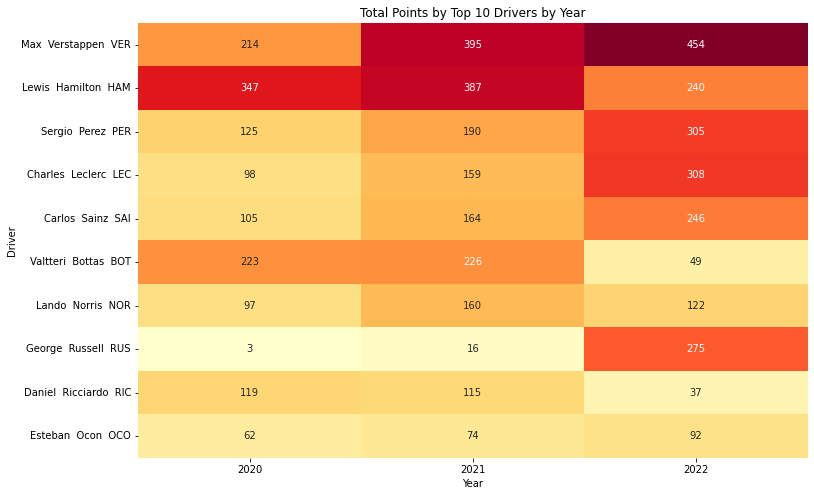

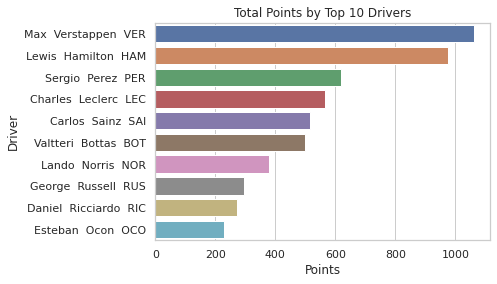

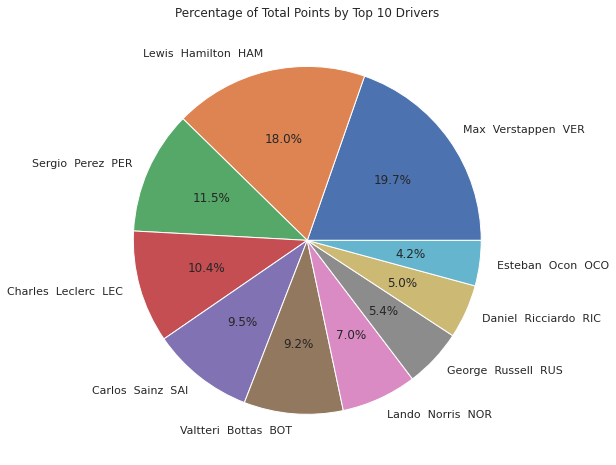

In [53]:
#set chart size
plt.figure(figsize=(12,8))
#create heatmap using Seaborn & matplotlib
sns.heatmap(clpvstandings.head(10), cmap='YlOrRd', annot=True, fmt=".0f", cbar=False)
plt.title('Total Points by Top 10 Drivers by Year')
plt.xlabel('Year')
plt.ylabel('Driver')
#show chart
plt.show()

# Group the DataFrame by driver and reset the index
drpoints = StandingsCOMB.groupby('Driver').agg({'Points': 'sum'}).reset_index()

#Calculate the percentage of total points for each driver 
drpoints['%'] = 100 * drpoints['Points'] / drpoints['Points'].sum()


#Sort the DataFrame by highest points
drpoints = drpoints.sort_values('Points', ascending=False)


#display and use custom function to reduce decimal places on %
#display(round_to_two_decimal_places(df.head(10)))

# Create the horizontal bar plot using seaborn
sns.set(style="whitegrid")
fig, ax = plt.subplots()
#Only show top 10
sns.barplot(x='Points', y='Driver', data=drpoints.head(10), ax=ax)
ax.set_xlabel('Points')
ax.set_ylabel('Driver')
#Set title
ax.set_title('Total Points by Top 10 Drivers')
plt.show()


#Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(drpoints.head(10)['%'], labels=drpoints.head(10)['Driver'], autopct='%1.1f%%')
# set title
plt.title('Percentage of Total Points by Top 10 Drivers')
plt.show()




**SQL Data**

In [54]:
# seasons.sqlite imported from SQLlite using the seasons file, the following SQL statement was used to reduce to only required seasons: SELECT * FROM seasons Where year > "2019"
seasons = 'https://raw.githubusercontent.com/brianregan111/UCDPA-BrianRegan/main/Seasons.SQLite.csv'
seasons = pd.read_csv(seasons , index_col=0) 
#display(seasons)